<a href="https://colab.research.google.com/github/shivam92211/Customer-Churn-Prediction/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction

In [1]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Loading Data

In [3]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')
df.shape

(100000, 9)

# Analysing Data

In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [ ]:
df.size

900000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [ ]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.skew(numeric_only = True)

CustomerID                    0.000000
Age                          -0.002689
Subscription_Length_Months   -0.001655
Monthly_Bill                 -0.000326
Total_Usage_GB                0.007113
Churn                         0.008840
dtype: float64

In [ ]:
df.corr(numeric_only= True)

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


In [ ]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


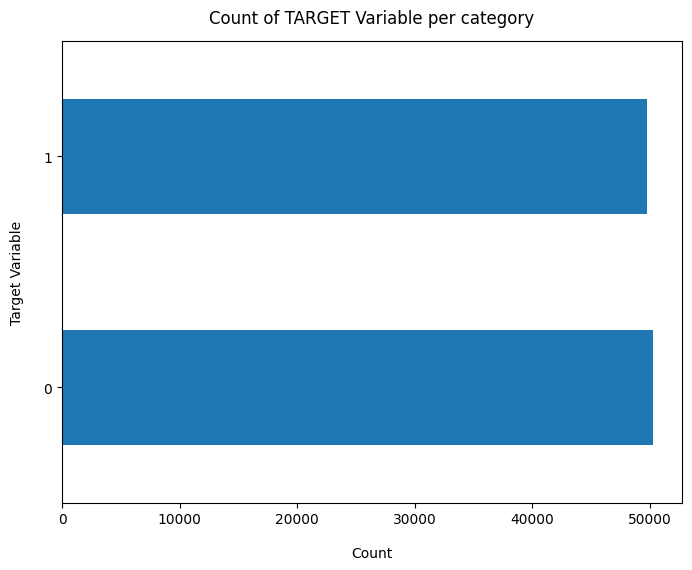

In [ ]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

We can see that our data is balance data

In [ ]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [ ]:
# Finding the percentage of churn and not churn
100*df['Churn'].value_counts()/len(df['Churn'])

0    50.221
1    49.779
Name: Churn, dtype: float64

In [ ]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


# Cleaning and Preparing the Data to use

In [4]:
telco_data = df.copy()

In [5]:
telco_data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [6]:
telco_data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [7]:
# Droping Irrelevent Features
data = telco_data.drop(['CustomerID', 'Name'], axis=1)
data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


### Encoding Categorical Value to Nemericul

In [8]:
data['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [9]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,0,1
2,24,5,85.47,460,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,1,0
4,46,19,58.14,266,0,0,0,0,1,0


In [77]:
data.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn', 'Gender_Male', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York'],
      dtype='object')

# Spliting the Data

In [10]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [11]:
X

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,1
2,24,5,85.47,460,0,0,1,0,0
3,36,3,97.94,297,0,0,0,1,0
4,46,19,58.14,266,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
99995,33,23,55.13,226,1,1,0,0,0
99996,62,19,61.65,351,0,0,0,0,1
99997,64,17,96.11,251,1,0,0,0,0
99998,51,20,49.25,434,0,0,0,0,1


In [12]:
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

### Splinting the data into train and test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()

In [17]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [86]:
sc.mean_

array([4.40845333e+01, 1.25031667e+01, 6.49654067e+01, 2.73657467e+02,
       4.99466667e-01, 2.01333333e-01, 2.00900000e-01, 1.97300000e-01,
       1.96500000e-01])

In [87]:
sc.scale_

array([ 15.27992542,   6.94274609,  20.21621534, 130.35319791,
         0.49999972,   0.40099654,   0.40067342,   0.39796069,
         0.39735092])

In [85]:
# Train your model and calculate the mean and std
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save the mean and std
scaler_params = {
    'mean': scaler.mean_,
    'std': scaler.scale_
}

with open('scaler_params.pkl', 'wb') as f:
    pickle.dump(scaler_params, f)


In [18]:
X_train

array([[-1.24358948,  0.07450054,  1.63264172, ...,  1.99875086,
        -0.50249877, -0.49816897],
       [ 0.6542839 , -1.51522972,  0.33647778, ..., -0.50031248,
        -0.50249877, -0.49816897],
       [-0.78548211,  1.08614707,  0.027632  , ..., -0.50031248,
        -0.50249877, -0.49816897],
       ...,
       [ 1.63594255, -1.51522972,  0.55094028, ..., -0.50031248,
        -0.50249877, -0.49816897],
       [ 0.71972781, -0.07002039,  1.19086873, ..., -0.50031248,
        -0.50249877, -0.49816897],
       [-1.17814557,  0.65258427,  0.26284895, ...,  1.99875086,
        -0.50249877, -0.49816897]])

# Model Testing

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log = LogisticRegression()

In [21]:
log.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = log.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, precision_score

In [24]:
accuracy_score(y_test, y_pred)

0.5047

In [25]:
precision_score(y_test, y_pred)

0.4995626938061541

### Support Vector Machine

In [26]:
from sklearn import svm

In [27]:
svm = svm.SVC()

In [28]:
svm.fit(X_train, y_train)

SVC()

In [31]:
y_pred2 = svm.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred2)

0.5007666666666667

In [33]:
precision_score(y_test, y_pred2)

0.4950563347896068

### KNeighbors Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier()

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred3 = knn.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred3)

0.4975333333333333

In [39]:
precision_score(y_test, y_pred3)

0.4924272885672162

### Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier()

In [42]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
y_pred4 = dt.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred4)

0.5015333333333334

In [45]:
precision_score(y_test, y_pred4)

0.4964472449389999

### Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier()

In [48]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
y_pred5 = rf.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred5)

0.4974

In [51]:
precision_score(y_test, y_pred5)

0.491991643454039

### Gradient Boosting Classifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
from numpy.lib.function_base import gradient

In [54]:
gbc = GradientBoostingClassifier()

In [55]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [56]:
y_pred6 = gbc.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred6)

0.5005666666666667

In [58]:
precision_score(y_test, y_pred6)

0.4951761595083256

In [59]:
final_data = pd.DataFrame({'Model':['LR','SVC','KNN','DT','RF','GBC'],
                           'ACC':[accuracy_score(y_test, y_pred),
                                  accuracy_score(y_test, y_pred2),
                                  accuracy_score(y_test, y_pred3),
                                  accuracy_score(y_test, y_pred4),
                                  accuracy_score(y_test, y_pred5),
                                  accuracy_score(y_test, y_pred6),
                                  ],
                           'PS':[precision_score(y_test, y_pred),
                                 precision_score(y_test, y_pred2),
                                 precision_score(y_test, y_pred3),
                                 precision_score(y_test, y_pred4),
                                 precision_score(y_test, y_pred5),
                                 precision_score(y_test, y_pred6),
                                 ]
                           })

In [60]:
final_data

,Model,ACC,PS
0,LR,0.504700,0.499563
1,SVC,0.500767,0.495056
2,KNN,0.497533,0.492427
3,DT,0.501533,0.496447
4,RF,0.497400,0.491992
5,GBC,0.500567,0.495176


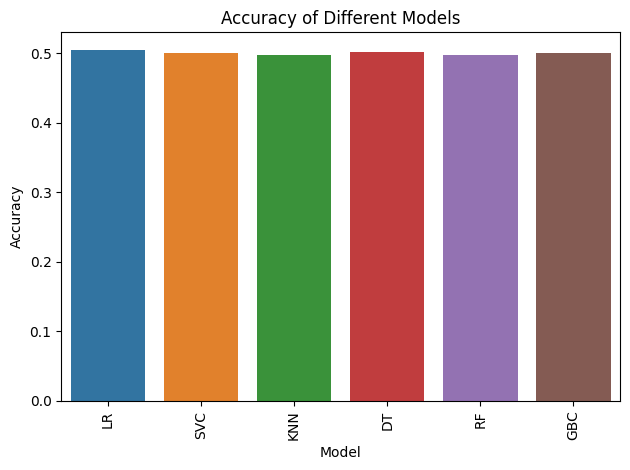

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_data is your DataFrame

sns.barplot(x='Model', y='ACC', data=final_data)
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.tight_layout()
plt.show()


# Tunning the Model

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'fit_intercept': [True, False]
}

# Create a LinearRegression model
model = LinearRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)

# You can now analyze the test predictions further or calculate performance metrics


Best Parameters: {'fit_intercept': True}
Best Negative Mean Squared Error: -0.25004940559353594


In [67]:
grid_search.cv_results_

{'mean_fit_time': array([0.12094164, 0.09939795]),
 'std_fit_time': array([0.01772696, 0.01553605]),
 'mean_score_time': array([0.00939946, 0.01026678]),
 'std_score_time': array([0.0037194 , 0.00613266]),
 'param_fit_intercept': masked_array(data=[True, False],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'fit_intercept': True}, {'fit_intercept': False}],
 'split0_test_score': array([-0.25002001, -0.50060593]),
 'split1_test_score': array([-0.25007197, -0.49250513]),
 'split2_test_score': array([-0.25006898, -0.49915079]),
 'split3_test_score': array([-0.24995368, -0.49832721]),
 'split4_test_score': array([-0.25013239, -0.50484268]),
 'mean_test_score': array([-0.25004941, -0.49908635]),
 'std_test_score': array([5.96741851e-05, 3.98339774e-03]),
 'rank_test_score': array([1, 2], dtype=int32)}

In [68]:
gs_df = pd.DataFrame(grid_search.cv_results_)
gs_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.120942,0.017727,0.009399,0.003719,True,{'fit_intercept': True},-0.250020,-0.250072,-0.250069,-0.249954,-0.250132,-0.250049,0.000060,1
1,0.099398,0.015536,0.010267,0.006133,False,{'fit_intercept': False},-0.500606,-0.492505,-0.499151,-0.498327,-0.504843,-0.499086,0.003983,2


In [71]:
 # Use the best parameters from GridSearchCV
best_params = grid_search.best_params_

# Create a LinearRegression model with the best parameters
best_model = LinearRegression(**best_params)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Predict on the test data
test_predictions = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the evaluation metrics
print("Best Model Accuracy:", accuracy)
print("Best Model Precision:", precision)


Best Model Accuracy: 0.5047
Best Model Precision: 0.4995626938061541


# Saving The Model

In [83]:
import pickle

with open('scaler_params', 'wb') as f:
  pickle.dump(sc,f)

In [80]:
%%writefile app.py

import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

# Load the saved model
with open('model_gs', 'rb') as f:
    best_model = pickle.load(f)

# Streamlit App
st.title("Customer Churn Prediction App")

# Collect user inputs
age = st.number_input("Age", min_value=0)
subscription_length = st.number_input("Subscription Length (Months)", min_value=0)
monthly_bill = st.number_input("Monthly Bill", min_value=0)
total_usage = st.number_input("Total Usage (GB)", min_value=0)
gender_male = st.selectbox("Gender: Male", ["No", "Yes"])
location = st.selectbox("Location", ["Houston", "Los Angeles", "Miami", "New York"])

# Convert gender and location inputs to one-hot encoded features
gender_encoded = 1 if gender_male == "Yes" else 0
locations = ["Houston", "Los Angeles", "Miami", "New York"]
location_encoded = [1 if loc == location else 0 for loc in locations]

# Create a DataFrame from user inputs
user_data = pd.DataFrame({
    'Age': [age],
    'Subscription_Length_Months': [subscription_length],
    'Monthly_Bill': [monthly_bill],
    'Total_Usage_GB': [total_usage],
    'Churn': [0],  # Placeholder value, as we're predicting this
    'Gender_Male': [gender_encoded],
    'Location_Houston': [location_encoded[0]],
    'Location_Los Angeles': [location_encoded[1]],
    'Location_Miami': [location_encoded[2]],
    'Location_New York': [location_encoded[3]]
})

# Feature Scaling
sc = StandardScaler()
user_data_scaled = sc.transform(user_data)

# Predict churn
churn_prediction = best_model.predict(user_data_scaled)

# Display the prediction
if churn_prediction[0] == 0:
    st.write("The customer is predicted to stay.")
else:
    st.write("The customer is predicted to churn.")


Writing app.py


In [81]:
! wget -q -O - ipv4.icanhazip.com

34.16.179.29


In [82]:
! streamlit run app.py & npx localtunnel --port 8501

/bin/bash: line 1: streamlit: command not found
npx: installed 22 in 5.429s
your url is: https://fuzzy-eyes-matter.loca.lt
^C
